In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r'D:\FILE_IRFAN_KARIM\Rakamin DS MSIB\Tugas\Homework Week 9/Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

#### Pilih beberapa kolom numerik yang penting

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
nums = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']

In [8]:
df[nums].describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,0.581654,57510.492818
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000


Interpretasi :
Dari variabel nums yang terdiri dari 6 variabel. Untuk variabel mean dan median dari credit score, age, dan tenure memiliki nilai yang sama dan diprediksi berdistribusi normal. Untuk 3 kolom lainnya harus dianalisis lebih lanjut untuk melihat plot distribusinya.

In [9]:
from scipy import stats

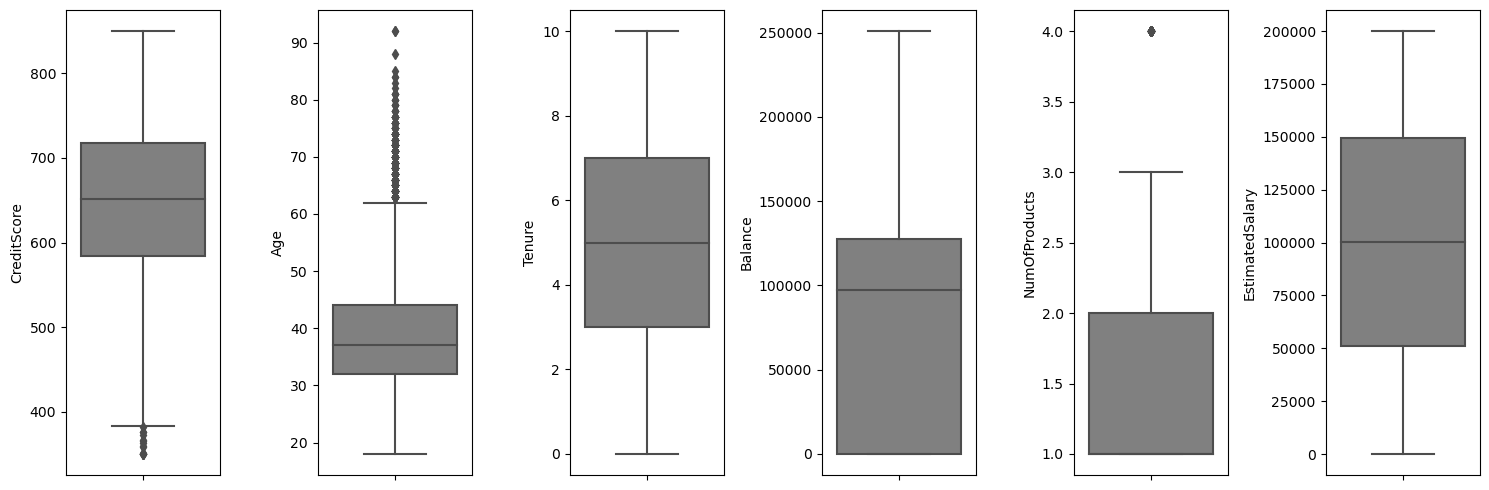

In [10]:
# Distribusi kolom Numerik dengan boxplot
plt.figure(figsize=(15, 5))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df[nums[i]], color='gray', orient='v')
    plt.tight_layout()
plt.show()

Kolom age memiliki outlier yang cukup banyak terlihat pada boxplot sehingga nilai ini cukup berpengaruh jika digunakan dalam analisis

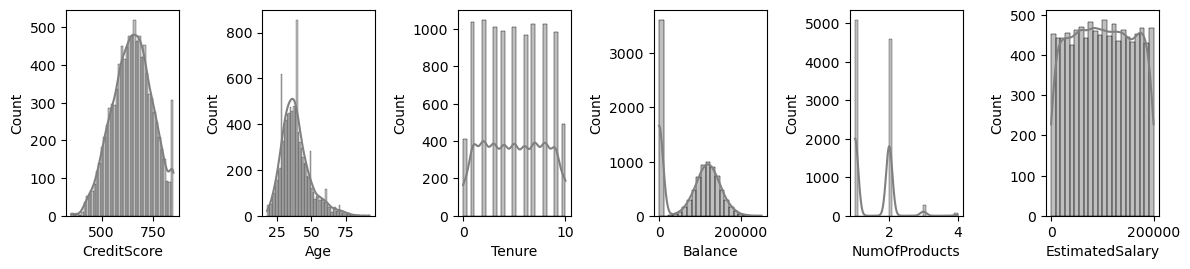

In [35]:
# Distribusi kolom Numerik dengan histplot
plt.figure(figsize=(12, 5))
for i in range(0, len(nums)):
    plt.subplot(2, len(nums), i+1)
    sns.histplot(df[nums[i]], kde=True, color='gray')
    plt.tight_layout()

Pada distribusi plot dari keenam variabel, didapatkan variabel age berskew positif. untuk balance dan num of product terdapat 2 puncak atau bimodal. Selain itu untuk estimated salary dan tenure cenderung stasioner di nilai-nilai tertentu.

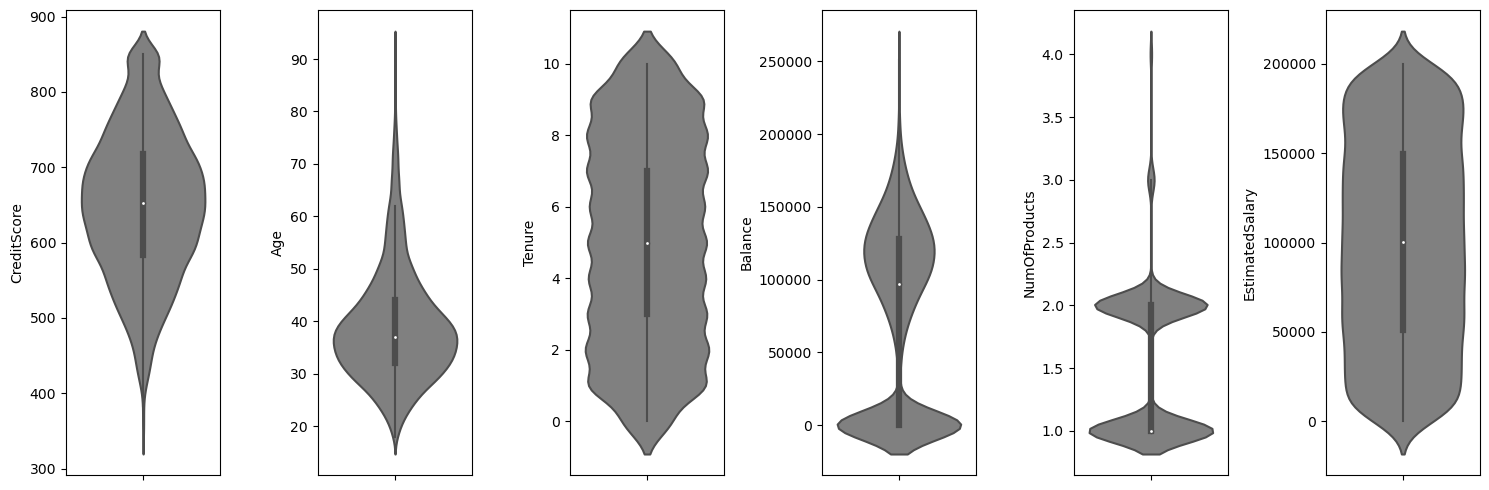

In [11]:
plt.figure(figsize=(15, 5))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.violinplot(y=df[nums[i]], color='gray', orient='v')
    plt.tight_layout()

In [12]:
df[cats].describe()

,HasCrCard,IsActiveMember,Exited
count,10000.00000,10000.000000,10000.000000
mean,0.70550,0.515100,0.203700
std,0.45584,0.499797,0.402769
min,0.00000,0.000000,0.000000
25%,0.00000,0.000000,0.000000
50%,1.00000,1.000000,0.000000
75%,1.00000,1.000000,0.000000
max,1.00000,1.000000,1.000000


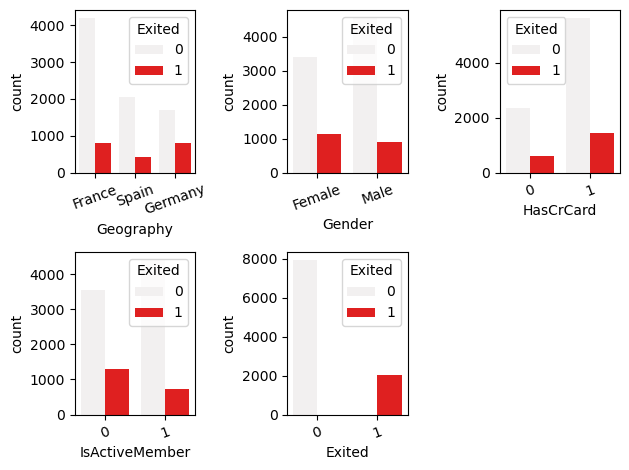

In [21]:
cats = ['Geography', 'Gender','HasCrCard','IsActiveMember','Exited']

for i in range(5):  # Perulangan sebanyak 5 kali
    plt.subplot(2, 3, i+1)
    sns.countplot(data=df, x=cats[i], color='red', orient='h', hue='Exited')
    plt.xticks(rotation=20)
    plt.tight_layout()

plt.show()

Pada hasil countplot di atas, dapat dilihat bahwa nasabah yang masuk kategori Geography:France berjumlah 5014 orang, untuk geography:Spain berjumlah 2509 berjumlah, dan untuk geography:Germany berjumlah 2477 orang.

Pada hasil countplot di atas, dapat dilihat bahwa nasabah yang masuk kategori Gender:Male berjumlah 5457, sedangkan untuk Female juga berjumlah 5453 orang.

Pada hasil countplot di atas, dapat dilihat bahwa nasabah yang memiliki credit card berjumlah 7055 orang, sedangkan untuk yang tidak memiliki cr card berjumlah 2945 orang.

Pada hasil countplot di atas, dapat dilihat bahwa nasabah yang masih aktif  berjumlah 5151 orang, sedangkan untuk yang tidak aktif berjumlah 4849 orang.

Pada hasil countplot di atas, dapat dilihat bahwa nasabah yang melakukan churn berjumlah 7963 orang, sedangkan untuk yang tidak churn berjumlah 2037 orang.

In [22]:
Geography_counts = (df['Geography'].value_counts())
print(Geography_counts)

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64


In [23]:
churn_counts = (df['Exited'].value_counts())
print(churn_counts)

0    7963
1    2037
Name: Exited, dtype: int64


In [24]:
Gender_counts = df[ 'Gender'].value_counts()
print(Gender_counts)

Male      5457
Female    4543
Name: Gender, dtype: int64


In [25]:
CrCard_counts = (df['HasCrCard'].value_counts())
print(CrCard_counts)

1    7055
0    2945
Name: HasCrCard, dtype: int64


In [26]:
ActiveMember_counts = (df['IsActiveMember'].value_counts())
print(ActiveMember_counts)

1    5151
0    4849
Name: IsActiveMember, dtype: int64


<h1>Follow Up nya</h1>

1. Skewness pada Variabel Age (Positif):
    Untuk menangani skewness positif, Anda dapat mempertimbangkan transformasi data seperti log-transform, atau menggunakan metode lain yang sesuai untuk mengubah distribusi menjadi lebih mendekati distribusi normal. Hal ini dapat membantu dalam meningkatkan kinerja beberapa model machine learning yang sensitif terhadap asumsi distribusi normal.

2. Bimodal pada Variabel Balance dan Num of Product:
    Keberadaan dua puncak pada distribusi (disebut bimodal) pada variabel Balance dan Num of Product menunjukkan adanya dua kelompok yang mungkin memiliki karakteristik yang berbeda. kita perlu memutuskan apakah ingin memperlakukan keduanya sebagai kelompok terpisah atau mencoba menggabungkannya menjadi satu kelompok tergantung pada tujuan analisis.
    
3. Variabel Estimated Salary dan Tenure Stasioner di Nilai Tertentu:
    Jika variabel Estimated Salary dan Tenure cenderung stasioner di nilai-nilai tertentu, ini bisa menjadi indikasi bahwa ada beberapa "titik potong" di mana distribusi berubah. 